In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,  QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/TSR/Thesis/Epileptic Seizure Recognition.csv')

Mounted at /content/drive


In [ ]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df.shape

(11500, 180)

In [ ]:
df=df.drop('Unnamed', axis=1)

In [ ]:
temp_df = df.copy()

In [ ]:
df['y']=np.where(df['y'] >1, 0,  1)


In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
df.y.value_counts()


0    9200
1    2300
Name: y, dtype: int64

In [ ]:
print(df.isna().sum())

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64


In [ ]:
X=df.drop('y', axis=1).columns


In [ ]:
log_columns = df[X].skew().sort_values(ascending=False)
to_log = log_columns.loc[log_columns > 0.75]

In [ ]:
len(to_log)

0

# Dimension Reduction

In [ ]:
X=df.drop('y', axis=1)
y=df.y

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [ ]:
train_idx, test_idx = next(split.split(X, y))


In [ ]:
X_train = df.loc[train_idx, X.columns.values]
y_train = df.loc[train_idx, 'y']
X_test = df.loc[test_idx, X.columns.values]
y_test = df.loc[test_idx, 'y']



In [ ]:
classifiers = [
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()]

In [ ]:
acc_vals = []
precision_vals = []
recall_vals = []
f_score_vals = []

In [ ]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    
    # calculate score
    acc = accuracy_score(y_test, train_predictions)
    precision = precision_score(y_test, train_predictions, average = 'macro') 
    recall = recall_score(y_test, train_predictions, average = 'macro') 
    f_score = f1_score(y_test, train_predictions, average = 'macro')
    
    acc_vals.append(acc)
    precision_vals.append(precision)
    recall_vals.append(recall)
    f_score_vals.append(f_score)

    print("Precision: {:.4%}".format(precision))
    print("Recall: {:.4%}".format(recall))
    print("F-score: {:.4%}".format(recall))
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

LogisticRegression
****Results****
Precision: 52.8983%
Recall: 53.9130%
F-score: 53.9130%
Accuracy: 63.5652%
SVC
****Results****
Precision: 94.3870%
Recall: 90.3261%
F-score: 90.3261%
Accuracy: 95.2174%
DecisionTreeClassifier
****Results****
Precision: 90.7283%
Recall: 90.4620%
F-score: 90.4620%
Accuracy: 94.0000%
RandomForestClassifier
****Results****
Precision: 96.5848%
Recall: 95.8967%
F-score: 95.8967%
Accuracy: 97.6087%
GradientBoostingClassifier
****Results****
Precision: 95.9919%
Recall: 92.8261%
F-score: 92.8261%
Accuracy: 96.4783%
MLPClassifier
****Results****
Precision: 80.3321%
Recall: 82.9891%
F-score: 82.9891%
Accuracy: 87.6522%


In [ ]:
lst = list()
feature_weight_list = list()

In [ ]:
def find_PCA_df(df, features):
    for n in range(2, features):


        PCAmod = PCA(n_components=n)
        PCAmod.fit(df)


        lst.append(pd.Series({'n':n, 'model':PCAmod,
                                   'var': PCAmod.explained_variance_ratio_.sum()}))


        abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
        feature_weight_list.append(pd.DataFrame({'n':n, 
                                                 'features': df.columns,
                                                 'values':abs_feature_values/abs_feature_values.sum()}))

    return pd.concat(lst, axis=1).T.set_index('n')


In [ ]:
pca_df = find_PCA_df(df,30)
print (pca_df)

                   model       var
n                                 
2    PCA(n_components=2)  0.108429
3    PCA(n_components=3)  0.157937
4    PCA(n_components=4)  0.206202
5    PCA(n_components=5)  0.250649
6    PCA(n_components=6)  0.292092
7    PCA(n_components=7)  0.332744
8    PCA(n_components=8)  0.371973
9    PCA(n_components=9)  0.408188
10  PCA(n_components=10)  0.442657
11  PCA(n_components=11)  0.475626
12  PCA(n_components=12)  0.508026
13  PCA(n_components=13)  0.537689
14  PCA(n_components=14)  0.566855
15  PCA(n_components=15)  0.592549
16  PCA(n_components=16)  0.616375
17  PCA(n_components=17)  0.637944
18  PCA(n_components=18)  0.658227
19  PCA(n_components=19)  0.678433
20  PCA(n_components=20)  0.697855
21  PCA(n_components=21)   0.71687
22  PCA(n_components=22)  0.735546
23  PCA(n_components=23)  0.753327
24  PCA(n_components=24)  0.770546
25  PCA(n_components=25)  0.787022
26  PCA(n_components=26)  0.803542
27  PCA(n_components=27)  0.818612
28  PCA(n_components

In [ ]:
pca_df['factors']=pca_df.index
pca_df['var'] = pd.to_numeric(pca_df['var'], errors='coerce')

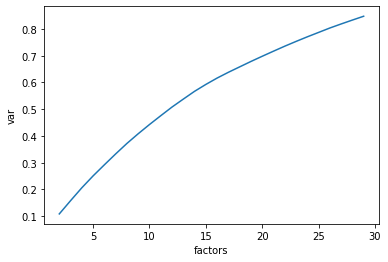

In [ ]:
sn.lineplot(data=pca_df, x='factors', y='var')

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [ ]:
def get_avg_score(n):
    pipe = [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', RandomForestClassifier())
    ]
    pipe = Pipeline(pipe)
    f1_scores = []
    for train_index, test_index in split.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        f1_scores.append(f1_score(y_test, pipe.predict(X_test)))
    return np.mean(f1_scores)

In [ ]:
ns = [5, 10, 20, 30, 40, 50, 100]
score_list = [get_avg_score(n) for n in ns]
print(score_list)

[0.8932461873638343, 0.9171151776103337, 0.9260450160771705, 0.935483870967742, 0.935483870967742, 0.9331896551724138, 0.9362162162162162]


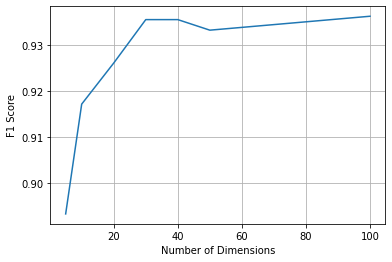

In [ ]:
ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='F1 Score')
ax.grid(True)

In [ ]:
from sklearn.cluster import KMeans
kmeans_list = list()


In [ ]:
for clusters in range(1,15):
    km = KMeans(n_clusters=clusters, random_state=42)
    km = km.fit(df[df.drop('y', axis=1).columns])
    
    kmeans_list.append(pd.Series({'clusters': clusters, 
                              'inertia': km.inertia_,
                              'model': km}))
# Prepare to plot    
elbow_graph_data = (pd.concat(kmeans_list, axis=1)
             .T
             [['clusters','inertia']])
elbow_graph_data[['clusters','inertia']]=elbow_graph_data[['clusters','inertia']].apply(pd.to_numeric, errors='coerce')

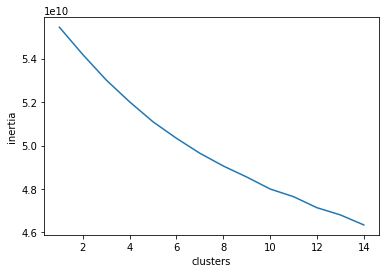

In [ ]:
sn.lineplot(data=elbow_graph_data, x='clusters', y='inertia')


In [ ]:
km = KMeans(n_clusters=5, random_state=42)
km = km.fit(df[df.drop('y', axis=1).columns])

In [ ]:
df['km_cluster'] = km.predict(df[df.drop('y', axis=1).columns])


In [ ]:
from sklearn.cluster import AgglomerativeClustering
AClust = AgglomerativeClustering(n_clusters=5, linkage='ward')
AClust = AClust.fit(df[df.drop('y', axis=1).columns])
df['AClust'] = AClust.fit_predict(df[df.drop('y', axis=1).columns])

In [ ]:
data_KM=df.drop(['AClust'], axis=1)
data_AG=df.drop(['km_cluster'], axis=1)
data_no_clusters=df.drop(['AClust', 'km_cluster'], axis=1)

In [ ]:
def test_clusters(estimator, X, y):
    f1_scores = []
    for train_index, test_index in split.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        estimator.fit(X_train, y_train)
        f1_scores.append(f1_score(y_test, estimator.predict(X_test)))
    return np.mean(f1_scores)

In [ ]:
f1_with_kmeans = test_clusters(RandomForestClassifier(), data_KM, y)
f1_with_hierarchial = test_clusters(RandomForestClassifier(), data_AG, y)
f1_with_no_clustering = test_clusters(RandomForestClassifier(), data_no_clusters, y)

In [ ]:
print('F1 score with K-means clustering:', f1_with_kmeans)
print('F1 score with hierarchial clustering:', f1_with_hierarchial)
print('F1 score with no clustering:', f1_with_no_clustering)

F1 score with K-means clustering: 0.998914223669924
F1 score with hierarchial clustering: 0.998914223669924
F1 score with no clustering: 1.0


No handles with labels found to put in legend.


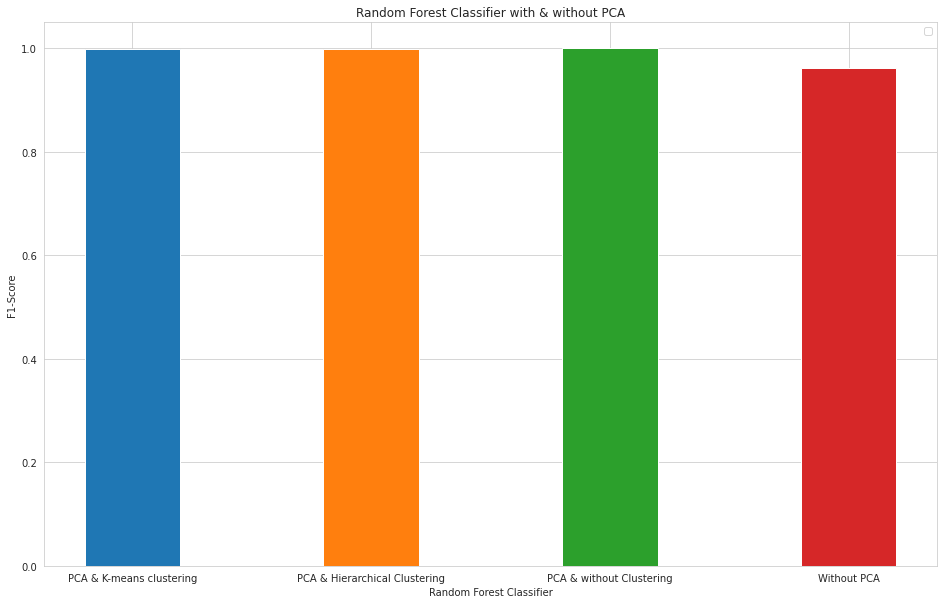

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
x1_kmeans = "PCA & K-means clustering"
y1_kmeans = f1_with_kmeans

x2_kmeans = "PCA & Hierarchical Clustering"
y2_kmeans = f1_with_hierarchial

x3_kmeans = "PCA & without Clustering"
y3_kmeans = f1_with_no_clustering

x4_kmeans = "Without PCA"
y4_kmeans = f_score_vals[3]



plt.bar(x1_kmeans, y1_kmeans, width=0.4)
plt.bar(x2_kmeans, y2_kmeans, width=0.4)
plt.bar(x3_kmeans, y3_kmeans, width=0.4)
plt.bar(x4_kmeans, y4_kmeans, width=0.4)
plt.plot()


#plt.bar(x1_kmeans, y1_kmeans, label="K-Means", width=0.4)
#plt.bar(x2_kmeans, y2_kmeans, label="Hierarchical Clustering", width=0.4)
#plt.bar(x3_kmeans, y3_kmeans, label="No Clustering", width=0.4)
#plt.bar(x4_kmeans, y4_kmeans, label="Random Forest without PCA", width=0.4)
#plt.plot()






plt.xlabel("Random Forest Classifier")
plt.ylabel("F1-Score")
plt.title("Random Forest Classifier with & without PCA")
plt.legend()
plt.show()

In [ ]:
abc = np.asarray(acc).astype(np.float64)

In [ ]:
acc_vals

[0.6356521739130435,
 0.9521739130434783,
 0.94,
 0.9760869565217392,
 0.9647826086956521,
 0.8765217391304347]

In [ ]:
df_results = pd.DataFrame({'classifier':['LR', 'SVC', 'DT', 'RF', 'GB', 'MLP'],
                          #  'data_set':['train']*9,
                          'accuracy':[acc_vals[0], acc_vals[1], acc_vals[2], acc_vals[3], acc_vals[4], acc_vals[5]],
                          'precisions':[precision_vals[0], precision_vals[1], precision_vals[2], precision_vals[3], precision_vals[4], precision_vals[5]],
                          'recall':[recall_vals[0], recall_vals[1], recall_vals[2], recall_vals[3], recall_vals[4], recall_vals[5]],
                          'f_score':[f_score_vals[0], f_score_vals[1], f_score_vals[2], f_score_vals[3], f_score_vals[4], f_score_vals[5]]})

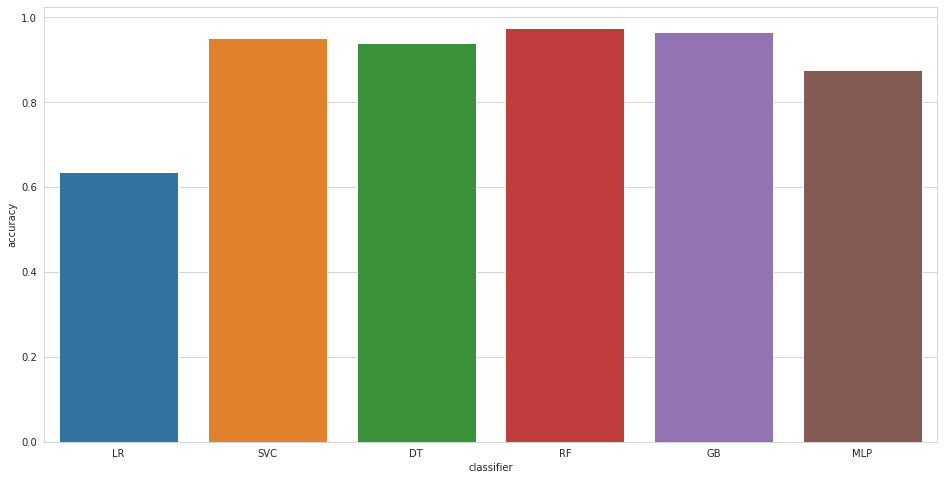

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'accuracy', data = df_results)



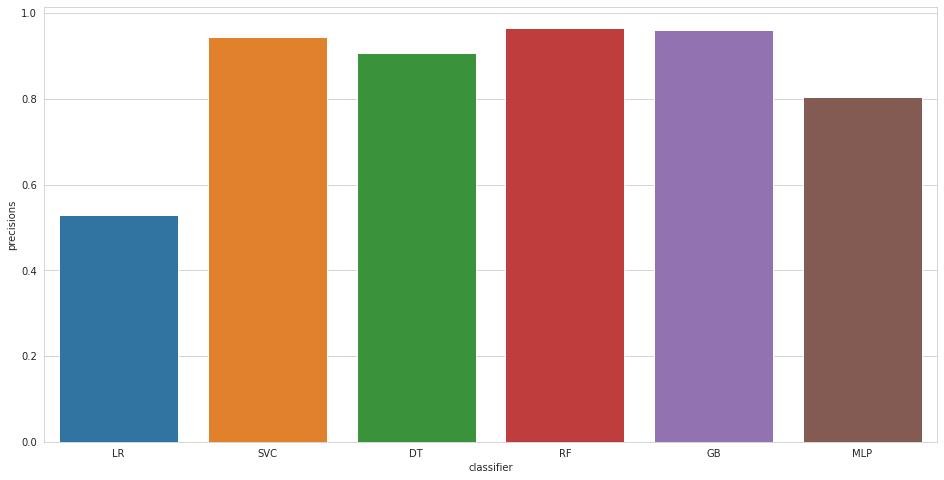

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
px = sns.barplot(x = 'classifier', y = 'precisions', data = df_results)


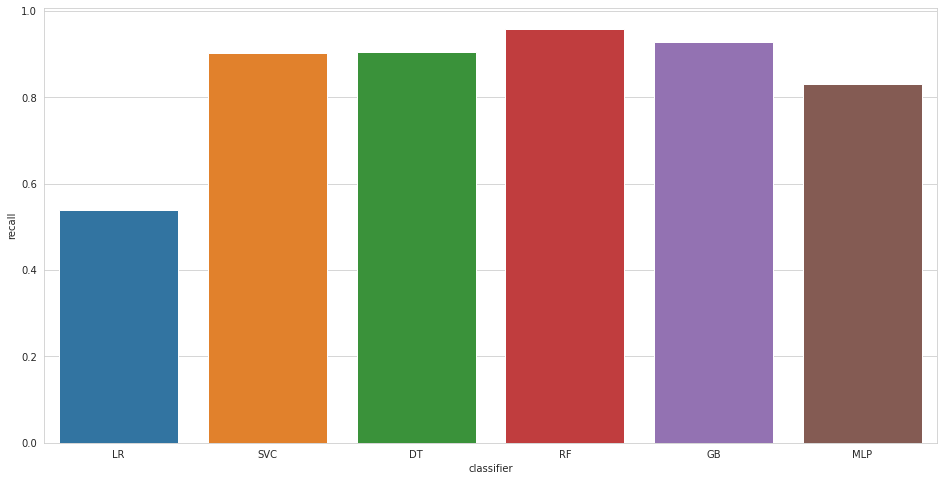

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
rx = sns.barplot(x = 'classifier', y = 'recall', data = df_results)

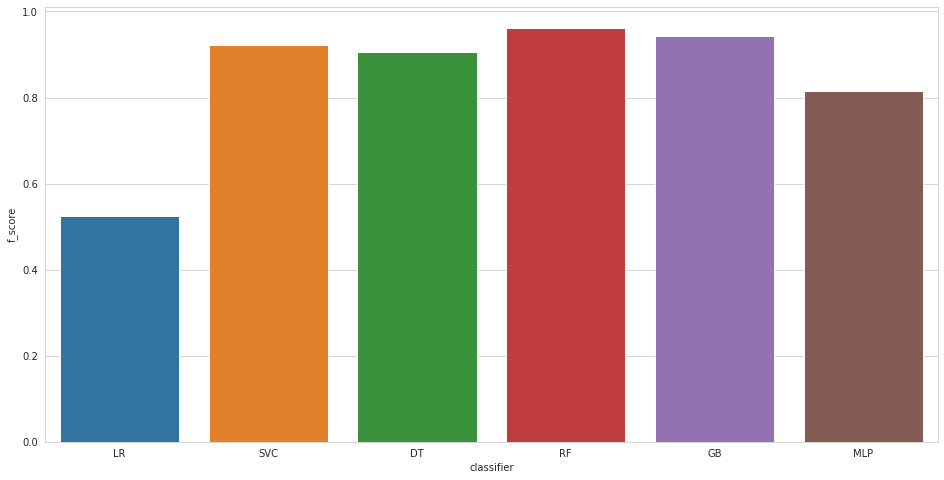

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
fx = sns.barplot(x = 'classifier', y = 'f_score', data = df_results)

In [ ]:
!pip install TPOT
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

     |████████████████████████████████| 87 kB 4.4 MB/s 
     |████████████████████████████████| 192.9 MB 92 kB/s 
     |████████████████████████████████| 160 kB 96.1 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=e4e66cea9dac06c2e4ecc8cb23b76f40ee9861b2340a4775c11d7c5d547178fc
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
best_model = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        make_union(
            make_union(
                FunctionTransformer(copy),
                make_union(
                    FunctionTransformer(copy),
                    make_union(
                        StackingEstimator(estimator=make_pipeline(
                            make_union(
                                FunctionTransformer(copy),
                                FunctionTransformer(copy)
                            ),
                            ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1,
                                                 min_samples_leaf=10, min_samples_split=10, n_estimators=100)
                        )),
                        FunctionTransformer(copy)
                    )
                )
            ),
            FunctionTransformer(copy)
        )
    ),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.05,
                         min_samples_leaf=2, min_samples_split=4, n_estimators=100)
)

best_model.fit(X_train, y_train)

y_train_preds = best_model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

In [ ]:
y_test_preds = best_model.predict_proba(X_test)[:,1]

In [ ]:
import pickle
pickle.dump(best_model, open('best_classifier.pkl', 'wb'),protocol = 4)

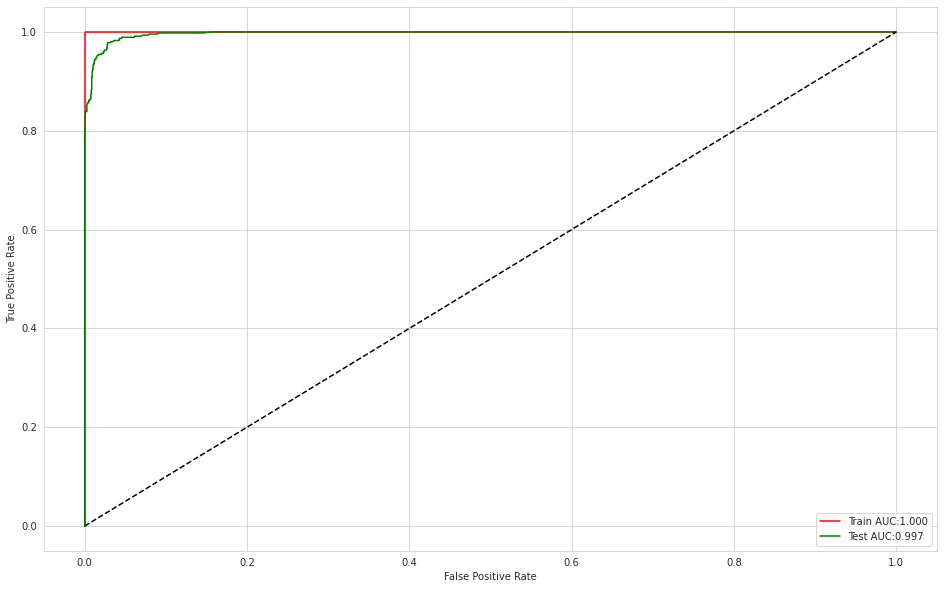

In [ ]:
from sklearn.metrics import roc_curve 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

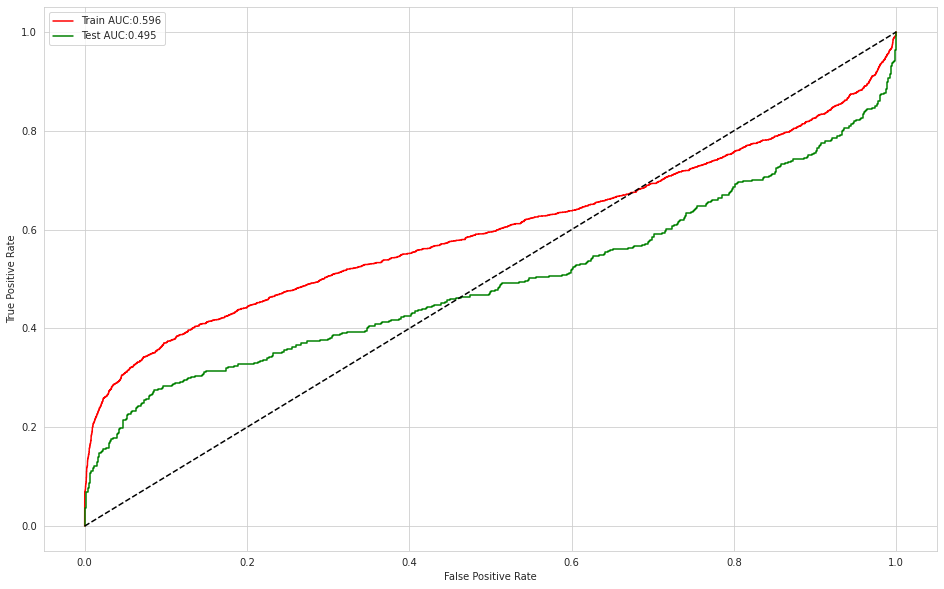

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_train_preds = model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

y_test_preds = model.predict_proba(X_test)[:,1]
import pickle
pickle.dump(model, open('best_classifier.pkl', 'wb'),protocol = 4)

from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

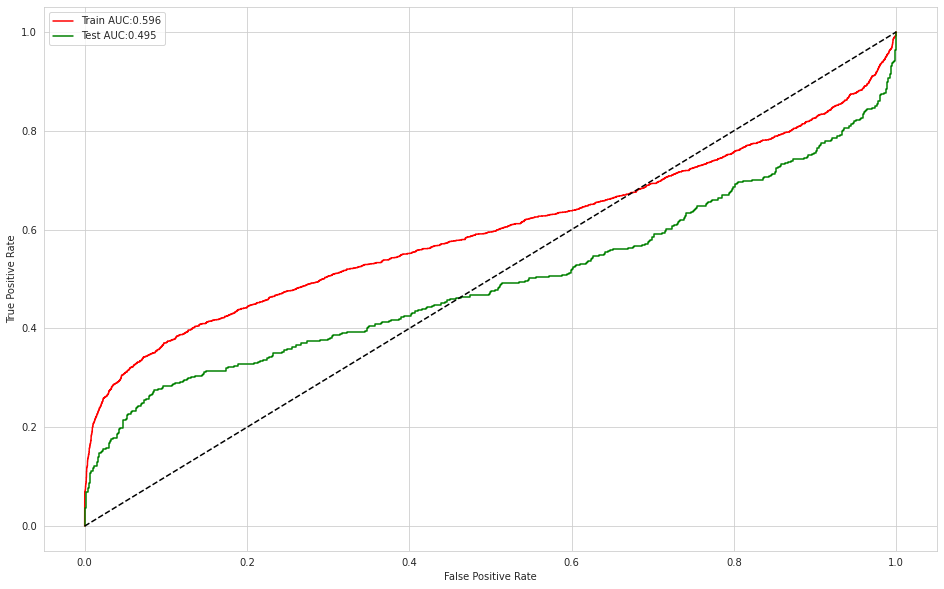

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_train_preds = model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

y_test_preds = model.predict_proba(X_test)[:,1]
import pickle
pickle.dump(model, open('best_classifier.pkl', 'wb'),protocol = 4)

from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

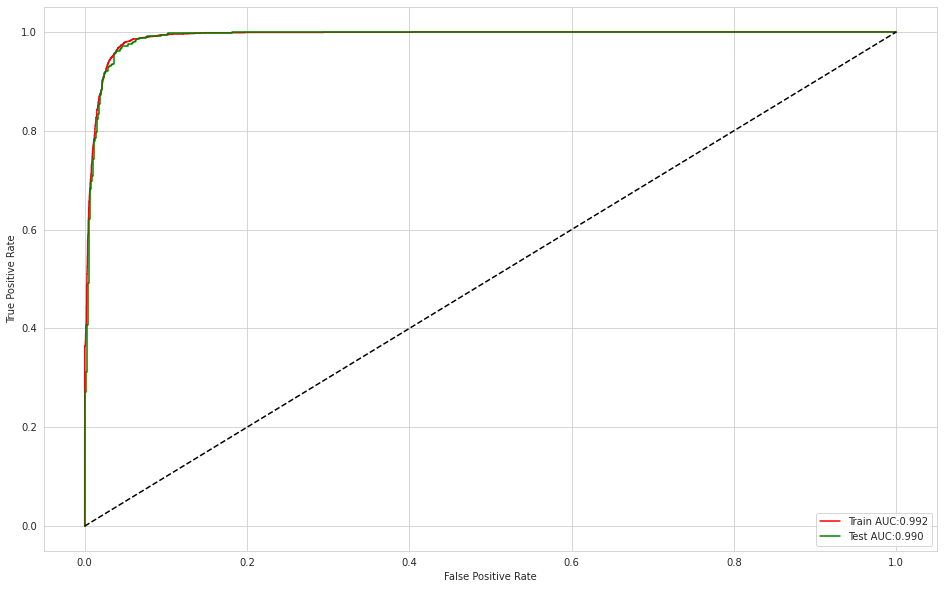

In [ ]:
model = SVC(kernel="rbf", C=0.025, probability=True).fit(X_train, y_train)
y_train_preds = model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

y_test_preds = model.predict_proba(X_test)[:,1]
import pickle
pickle.dump(model, open('best_classifier.pkl', 'wb'),protocol = 4)

from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

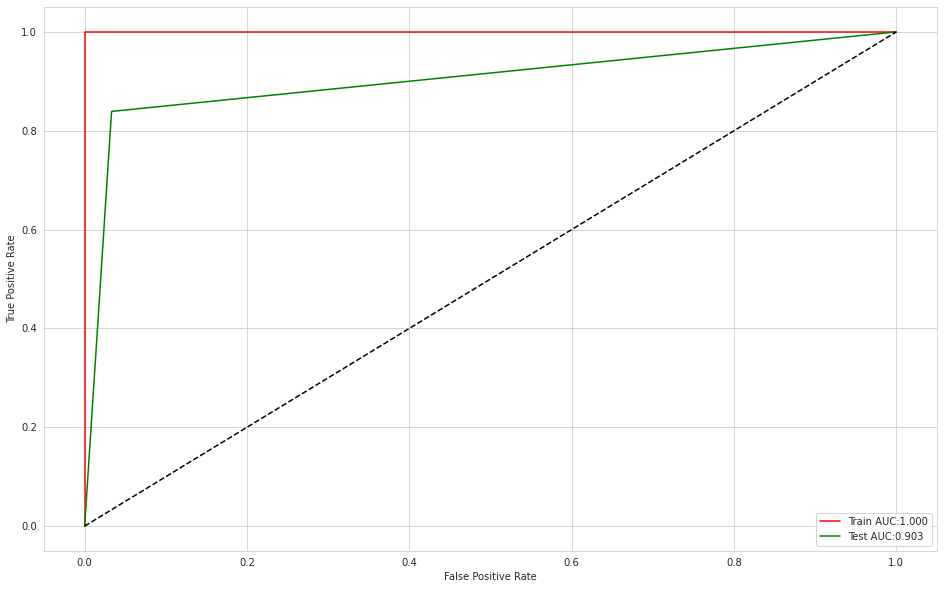

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)
y_train_preds = model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

y_test_preds = model.predict_proba(X_test)[:,1]
import pickle
pickle.dump(model, open('best_classifier.pkl', 'wb'),protocol = 4)

from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

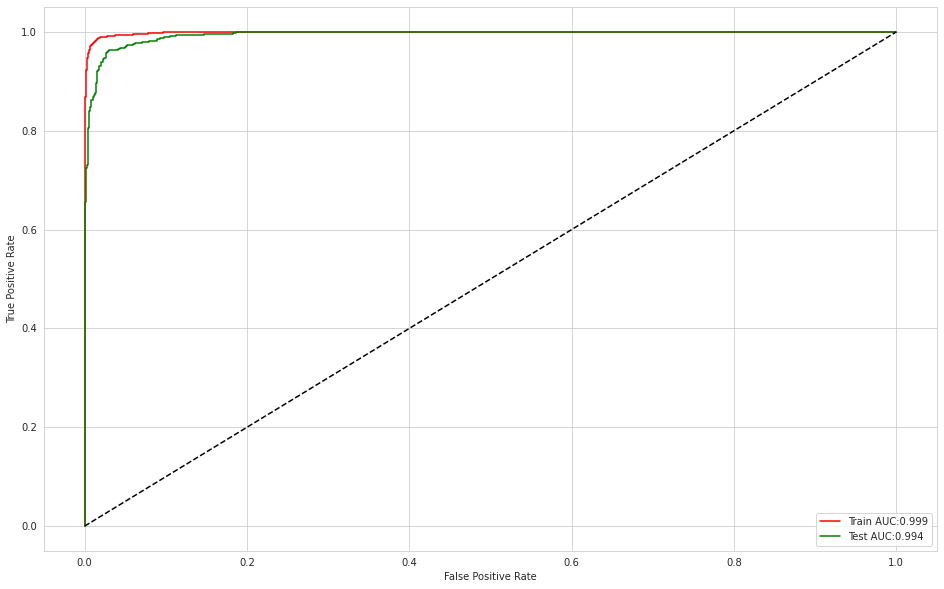

In [ ]:
model = GradientBoostingClassifier().fit(X_train, y_train)
y_train_preds = model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

y_test_preds = model.predict_proba(X_test)[:,1]
import pickle
pickle.dump(model, open('best_classifier.pkl', 'wb'),protocol = 4)

from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

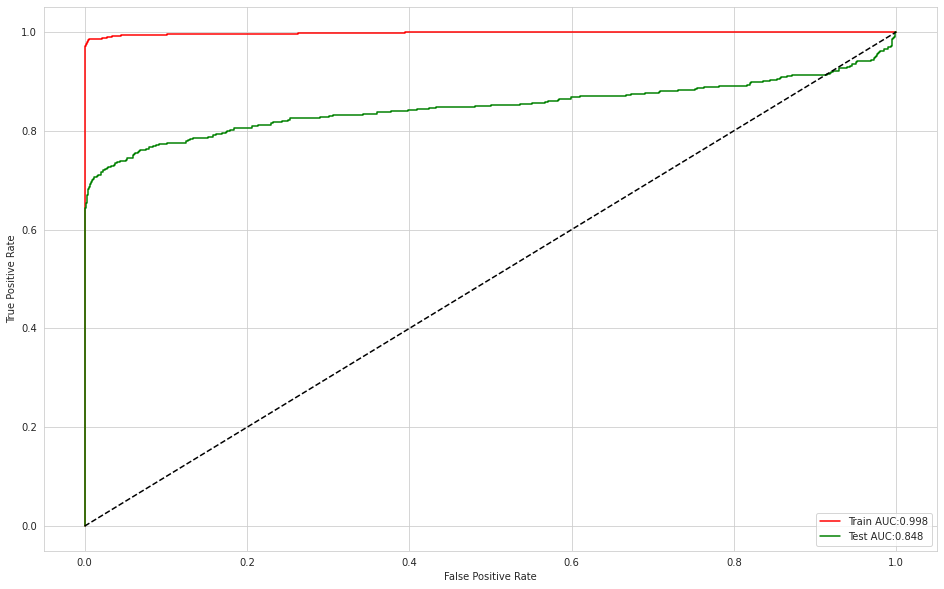

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
y_train_preds = model.predict_proba(X_train)[:, 1]
# y_valid_preds = best_model.predict_proba(X_valid)[:, 1]

# print('ExtraTrees Classifier')
# print('Training:')
# xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
#     y_train, y_train_preds, thresh)
# print('Validation:')
# xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
#     y_valid, y_valid_preds, thresh)

y_test_preds = model.predict_proba(X_test)[:,1]
import pickle
pickle.dump(model, open('best_classifier.pkl', 'wb'),protocol = 4)

from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
# auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
# plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()